In [12]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from mapper_functions import plot_global
from mapper_functions import plot_na

from my_functions import read_obsfcstana

In [13]:
path = '/discover/nobackup/amfox/Experiments/ASCAT_scale_test_debug_v2/ASCAT_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M06/'
file_name_start = 'ASCAT_M36.ens_avg.ldas_ObsFcstAna.201506'
printflag = False

date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path, file_name_start, printflag)

Total number of obs =  944641


In [20]:
date_time

{'year': array([2015], dtype=int32),
 'month': array([6], dtype=int32),
 'day': array([8], dtype=int32),
 'hour': array([6], dtype=int32),
 'min': array([0], dtype=int32),
 'sec': array([0], dtype=int32),
 'dofyr': array([159], dtype=int32),
 'pentad': array([32], dtype=int32)}

In [3]:
path = '/discover/nobackup/amfox/Experiments/ASCAT_noscale_test_debug/ASCAT_M36/output/SMAP_EASEv2_M36_GLOBAL/ana/ens_avg/Y2015/M06/'
file_name_start = 'ASCAT_M36.ens_avg.ldas_ObsFcstAna.201506'
printflag = False

date_time2, obs_species2, obs_tilenum2, obs_lon2, obs_lat2, obs_obs2, obs_obsvar2, obs_fcst2, obs_fcstvar2, obs_ana2, obs_anavar2 = read_obsfcstana(path, file_name_start, printflag)

Total number of obs =  1629620


In [4]:
# No-data check
#  - single ensemble member integrations yield obs_obsvar==nodata)  
#  - in some cases obs_fcst (a.k.a. Obs_pred) is no-data-value, 
#     eg. SMOS Tb when snow is present)

nodata = -9999

obs_obsvar[obs_obsvar == nodata] = np.nan
obs_fcst[obs_fcst == nodata] = np.nan
obs_fcstvar[obs_fcstvar == nodata] = np.nan
obs_ana[obs_ana == nodata] = np.nan
obs_anavar[obs_anavar == nodata] = np.nan

In [5]:
# Make obarray
    
numobs = len(obs_obs)
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon
obarray[:, 2] = obs_lat
obarray[:, 0] = obs_obs

# obarray[(obarray[ :, 0] > 1e16) , 0] = np.nan

In [6]:
# Make obarray
    
numobs2 = len(obs_obs2)
obarray2 = np.empty([numobs2, 3])
obarray2[:, 1] = obs_lon2
obarray2[:, 2] = obs_lat2
obarray2[:, 0] = obs_obs2

# obarray[(obarray[ :, 0] > 1e16) , 0] = np.nan

In [7]:
# find the unique rows based on values in the second and third columns
unique_rows, unique_indices, unique_counts = np.unique(obarray[:, 1:], axis=0, return_index=True, return_counts=True)

# count the number of unique rows
num_unique_rows = len(unique_rows)
len(obs_obs), len(unique_rows)

(944641, 944641)

In [8]:
# find the unique rows based on values in the second and third columns
unique_rows2, unique_indices2, unique_counts2 = np.unique(obarray2[:, 1:], axis=0, return_index=True, return_counts=True)

# count the number of unique rows
num_unique_rows2 = len(unique_rows2)
len(obs_obs2), len(unique_rows2)

(1629620, 1629620)

 Saving figure as unique_counts.png 



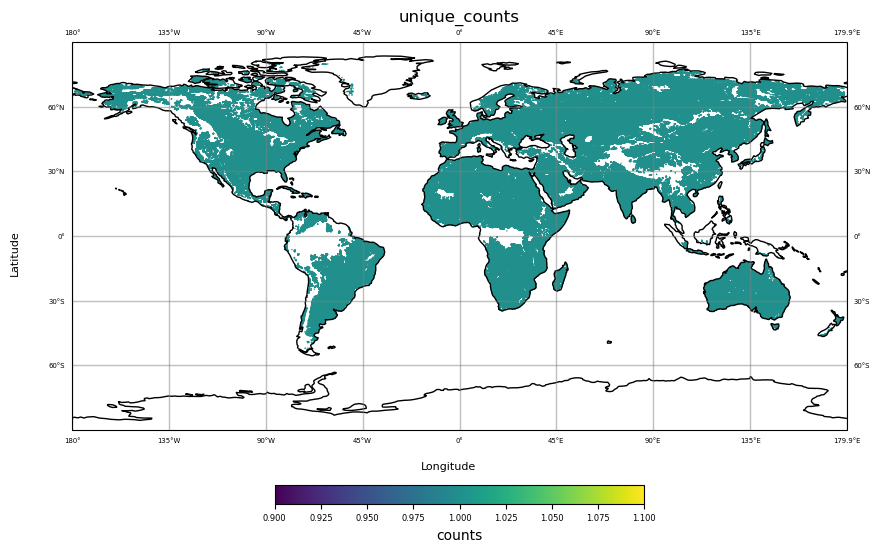

 Saving figure as NA unique_counts.png 



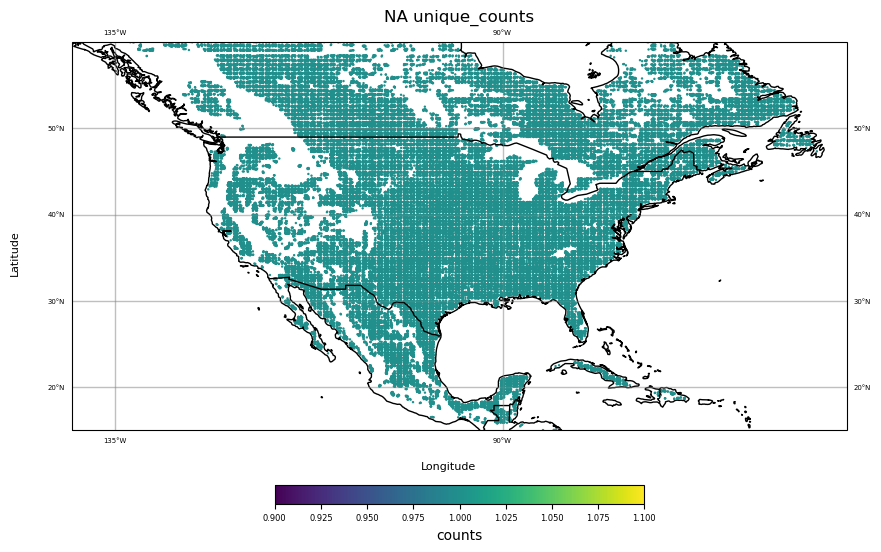

In [9]:
# print the number of occurrences of each unique row
# for i in range(num_unique_rows):
#     print("Row", unique_rows[i], "occurs", unique_counts[i], "times.")

tmp = np.empty([num_unique_rows, 3])
tmp[:, 1] = obarray[unique_indices, 1]
tmp[:, 2] = obarray[unique_indices, 2]
tmp[:, 0] = unique_counts

plot_global(tmp,True,'unique_counts','counts') 
plot_na(tmp,True,'NA unique_counts','counts') 

 Saving figure as Scaled_Observations.png 



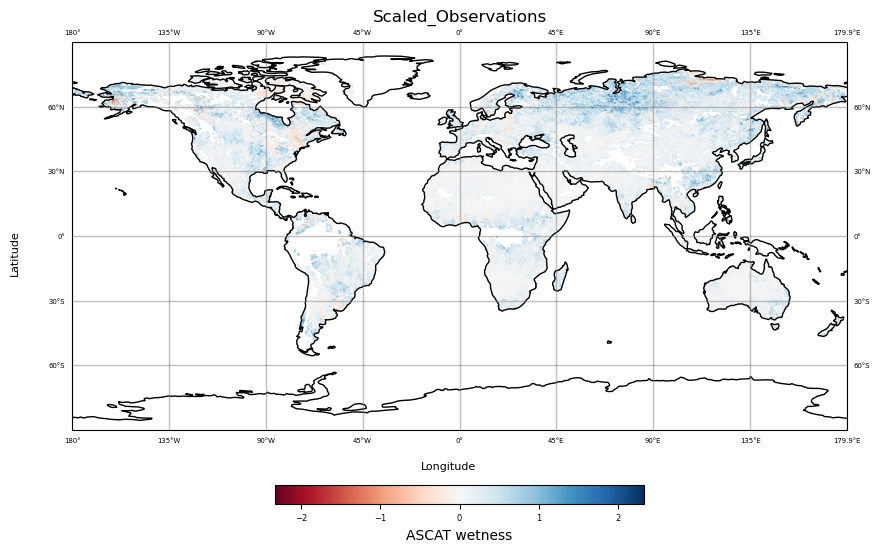

(-0.004014773518643904, 0.24712212203193826)

In [10]:
plot_global(obarray,True,'Scaled_Observations', 'ASCAT wetness')

omf = obs_obs - obs_fcst
omf2 = obs_obs2 - obs_fcst2


obarray[:, 0] = omf
np.mean(omf), np.mean(omf2)

In [38]:
np.mean(omf), np.mean(omf2), np.std(omf), np.std(omf2)

(-0.003952940730077413,
 0.24712212203193826,
 0.20576026524302252,
 0.233528967133672)

 Saving figure as Scaled_OmF.png 



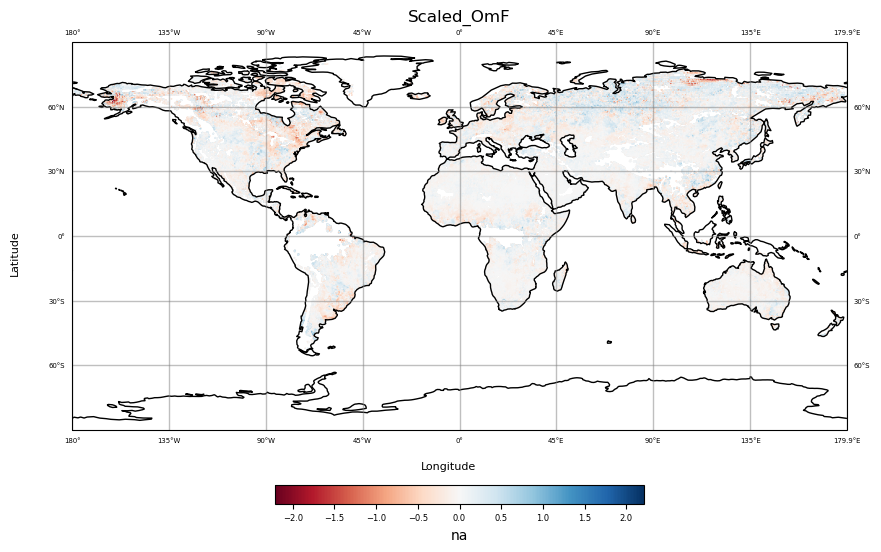

In [30]:
obarray[:, 0] = omf
plot_global(obarray,True,'Scaled_OmF')

 Saving figure as Original_Observations.png 



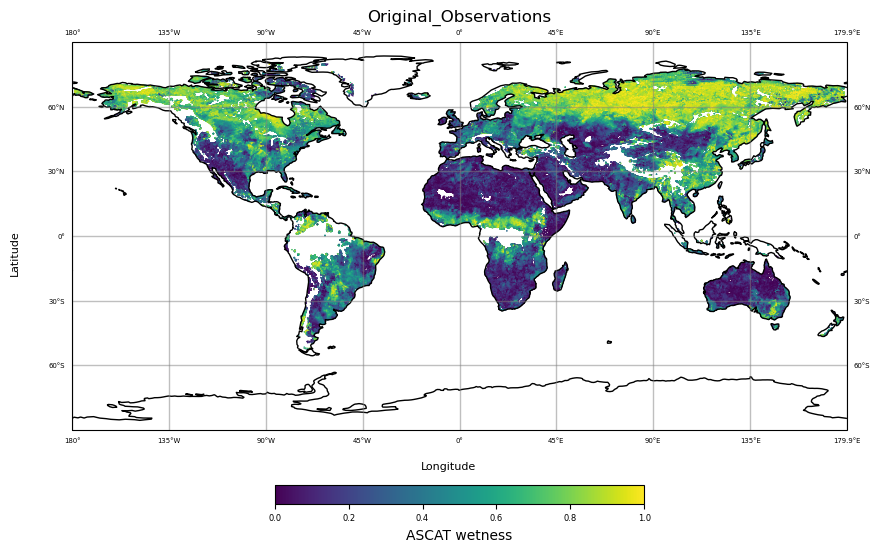

 Saving figure as Original_OmF.png 



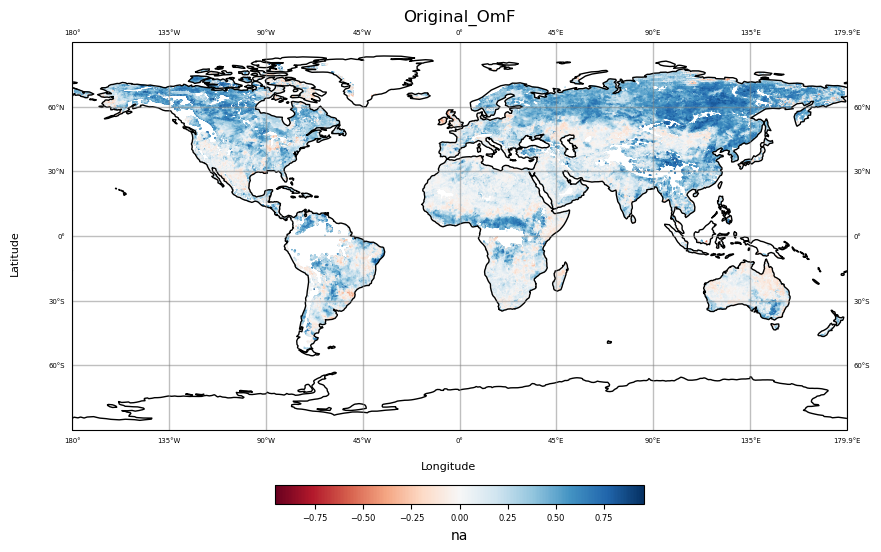

In [31]:
plot_global(obarray2, True, 'Original_Observations', 'ASCAT wetness')

obarray2[:, 0] = omf2
plot_global(obarray2, True, 'Original_OmF')

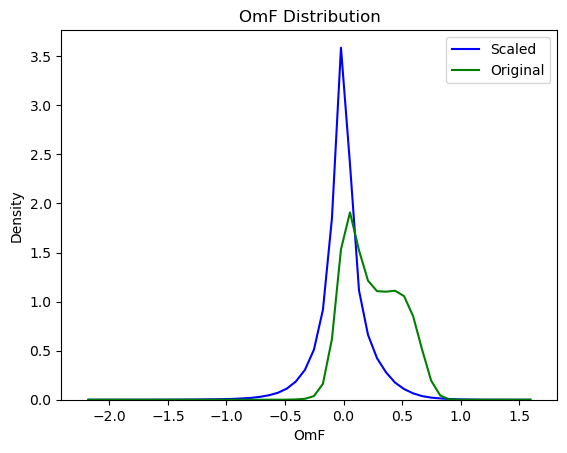

In [18]:
# Generate data
data1 = omf
data2 = omf2

# Plot histogram as a line
fig, ax = plt.subplots()

combined_data = np.concatenate([data1, data2])
bin_edges = np.linspace(np.min(combined_data), np.max(combined_data), 51)

n1, bins, patches = ax.hist(data1, density=True, bins=bin_edges, alpha=0)
n2, bins, patches = ax.hist(data2, density=True, bins=bin_edges, alpha=0)

ax.plot((bins[:-1] + bins[1:]) / 2, n2, color='green', label='Original')
ax.plot((bins[:-1] + bins[1:]) / 2, n1, color='blue', label='Scaled')

# Add labels and title
ax.set_xlabel('OmF')
ax.set_ylabel('Density')
ax.set_title('OmF Distribution')
ax.legend()

# Show plot
plt.show()

 Saving figure as obs_dis_cnt.png 



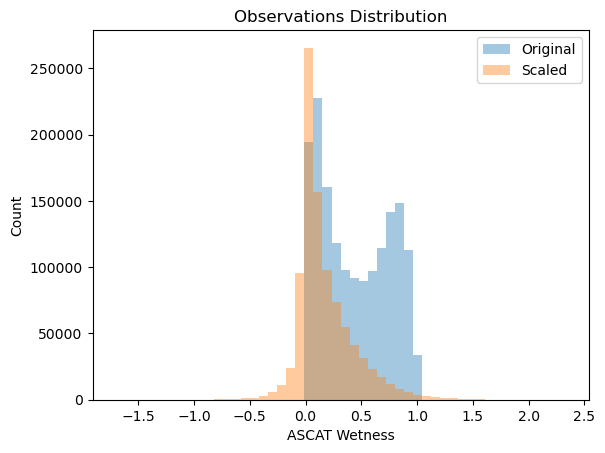

In [32]:
# Generate data
data1 = obs_obs
data2 = obs_obs2

# Define bin edges
combined_data = np.concatenate([data1, data2])
bin_edges = np.linspace(np.min(combined_data), np.max(combined_data), 51)

# Plot histogram as a line
fig, ax = plt.subplots()

n2, bins, patches = ax.hist(data2, density=False, bins=bin_edges, alpha=0.4, label='Original')
n1, bins, patches = ax.hist(data1, density=False, bins=bin_edges, alpha=0.4, label='Scaled')

# Add labels and title
ax.set_xlabel('ASCAT Wetness')
ax.set_ylabel('Count')
ax.set_title('Observations Distribution')
ax.legend()

savename = 'obs_dis_cnt.png'
print(" Saving figure as", savename, "\n")
plt.savefig(savename, dpi = 400)  

# Show plot
plt.show()

 Saving figure as obs_dis_fqy.png 



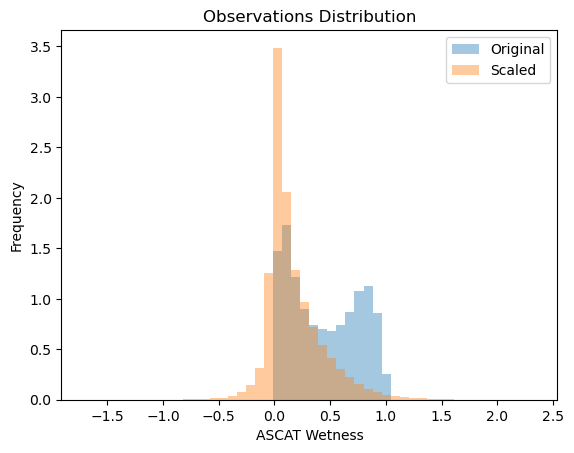

In [33]:
# Generate data
data1 = obs_obs
data2 = obs_obs2

# Define bin edges
combined_data = np.concatenate([data1, data2])
bin_edges = np.linspace(np.min(combined_data), np.max(combined_data), 51)

# Plot histogram as a line
fig, ax = plt.subplots()

n2, bins, patches = ax.hist(data2, density=True, bins=bin_edges, alpha=0.4, label='Original')
n1, bins, patches = ax.hist(data1, density=True, bins=bin_edges, alpha=0.4, label='Scaled')

# Add labels and title
ax.set_xlabel('ASCAT Wetness')
ax.set_ylabel('Frequency')
ax.set_title('Observations Distribution')
ax.legend()

savename = 'obs_dis_fqy.png'
print(" Saving figure as", savename, "\n")
plt.savefig(savename, dpi = 400)  

# Show plot
plt.show()

 Saving figure as obs_fcst_cnt.png 



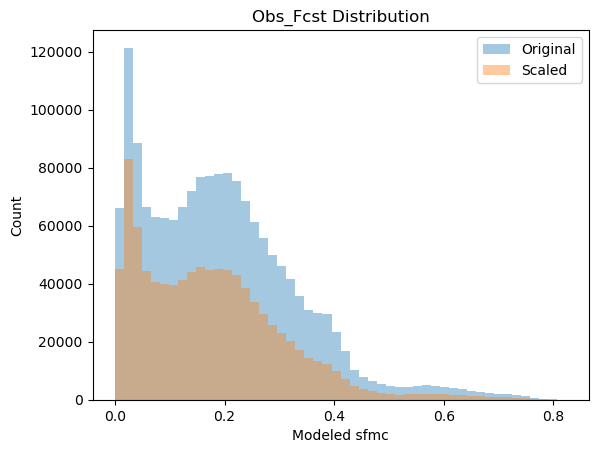

In [34]:
# Generate data
data1 = obs_fcst
data2 = obs_fcst2

# Define bin edges
combined_data = np.concatenate([data1, data2])
bin_edges = np.linspace(np.min(combined_data), np.max(combined_data), 51)

# Plot histogram as a line
fig, ax = plt.subplots()

n2, bins, patches = ax.hist(data2, density=False, bins=bin_edges, alpha=0.4, label='Original')
n1, bins, patches = ax.hist(data1, density=False, bins=bin_edges, alpha=0.4, label='Scaled')

# Add labels and title
ax.set_xlabel('Modeled sfmc')
ax.set_ylabel('Count')
ax.set_title('Obs_Fcst Distribution')
ax.legend()

savename = 'obs_fcst_cnt.png'
print(" Saving figure as", savename, "\n")
plt.savefig(savename, dpi = 400)  

# Show plot
plt.show()

 Saving figure as obs_fcst_fqy.png 



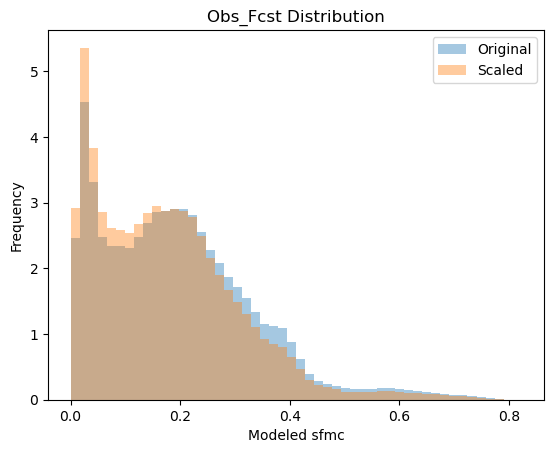

In [35]:
# Generate data
data1 = obs_fcst
data2 = obs_fcst2

# Define bin edges
combined_data = np.concatenate([data1, data2])
bin_edges = np.linspace(np.min(combined_data), np.max(combined_data), 51)

# Plot histogram as a line
fig, ax = plt.subplots()

n2, bins, patches = ax.hist(data2, density=True, bins=bin_edges, alpha=0.4, label='Original')
n1, bins, patches = ax.hist(data1, density=True, bins=bin_edges, alpha=0.4, label='Scaled')

# Add labels and title
ax.set_xlabel('Modeled sfmc')
ax.set_ylabel('Frequency')
ax.set_title('Obs_Fcst Distribution')
ax.legend()

savename = 'obs_fcst_fqy.png'
print(" Saving figure as", savename, "\n")
plt.savefig(savename, dpi = 400)  

# Show plot
plt.show()

 Saving figure as obs_m_fcst_cnt.png 



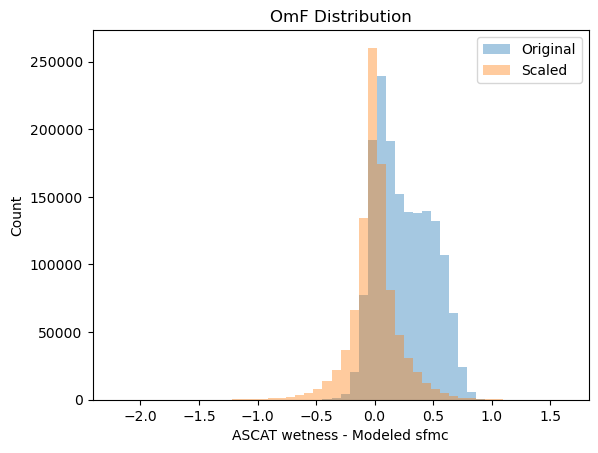

In [36]:
# Generate data
data1 = omf
data2 = omf2

# Define bin edges
combined_data = np.concatenate([data1, data2])
bin_edges = np.linspace(np.min(combined_data), np.max(combined_data), 51)

# Plot histogram as a line
fig, ax = plt.subplots()

n2, bins, patches = ax.hist(data2, density=False, bins=bin_edges, alpha=0.4, label='Original')
n1, bins, patches = ax.hist(data1, density=False, bins=bin_edges, alpha=0.4, label='Scaled')

# Add labels and title
ax.set_xlabel('ASCAT wetness - Modeled sfmc')
ax.set_ylabel('Count')
ax.set_title('OmF Distribution')
ax.legend()

savename = 'obs_m_fcst_cnt.png'
print(" Saving figure as", savename, "\n")
plt.savefig(savename, dpi = 400)  

# Show plot
plt.show()

 Saving figure as obs_m_fcst_fqy.png 



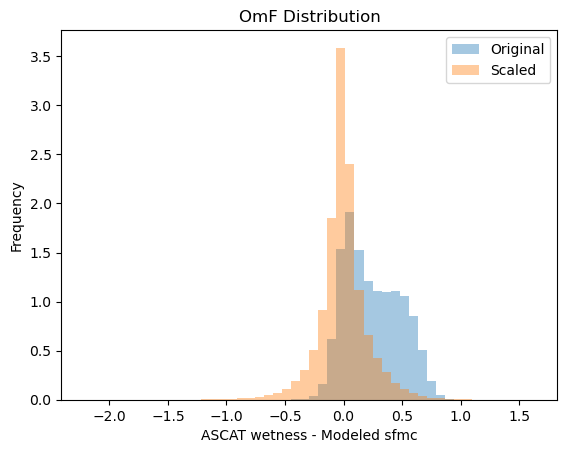

In [37]:
# Generate data
data1 = omf
data2 = omf2

# Define bin edges
combined_data = np.concatenate([data1, data2])
bin_edges = np.linspace(np.min(combined_data), np.max(combined_data), 51)

# Plot histogram as a line
fig, ax = plt.subplots()

n2, bins, patches = ax.hist(data2, density=True, bins=bin_edges, alpha=0.4, label='Original')
n1, bins, patches = ax.hist(data1, density=True, bins=bin_edges, alpha=0.4, label='Scaled')

# Add labels and title
ax.set_xlabel('ASCAT wetness - Modeled sfmc')
ax.set_ylabel('Frequency')
ax.set_title('OmF Distribution')
ax.legend()

savename = 'obs_m_fcst_fqy.png'
print(" Saving figure as", savename, "\n")
plt.savefig(savename, dpi = 400)  

# Show plot
plt.show()

In [28]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from mapper_functions import plot_global_contour

# Open the netCDF file using xarray
ds = xr.open_dataset('/discover/nobackup/amfox/Experiments/ASCAT_3Y_v2/ASCAT_M36/output/SMAP_EASEv2_M36_GLOBAL/stats/z_score_clim/combined_all_pentads_M36_zscore_stats_2015_doy152_2017_doy365_hscale_0.00.nc4')

# Select the variable of interest (o_mean) for pentad 31
o_mean = ds['o_mean'].sel(pentad=31)
o_std = ds['o_std'].sel(pentad=31)
m_mean = ds['m_mean'].sel(pentad=31)
m_std = ds['m_std'].sel(pentad=31)

lat = ds['lat']
lon = ds['lon']

# Create 2D grid of lons and lats
lon2d, lat2d = np.meshgrid(lon, lat)

# Replace values less than -10 with NaN
o_mean = np.where(o_mean < -10, np.nan, o_mean)
o_std = np.where(o_std < -10, np.nan, o_std)
m_mean = np.where(m_mean < -10, np.nan, m_mean)
m_std = np.where(m_std < -10, np.nan, m_std)

 Saving figure as o_mean_P31.png 

 Saving figure as o_std_P31.png 

 Saving figure as m_mean_P31.png 

 Saving figure as m_std_P31.png 



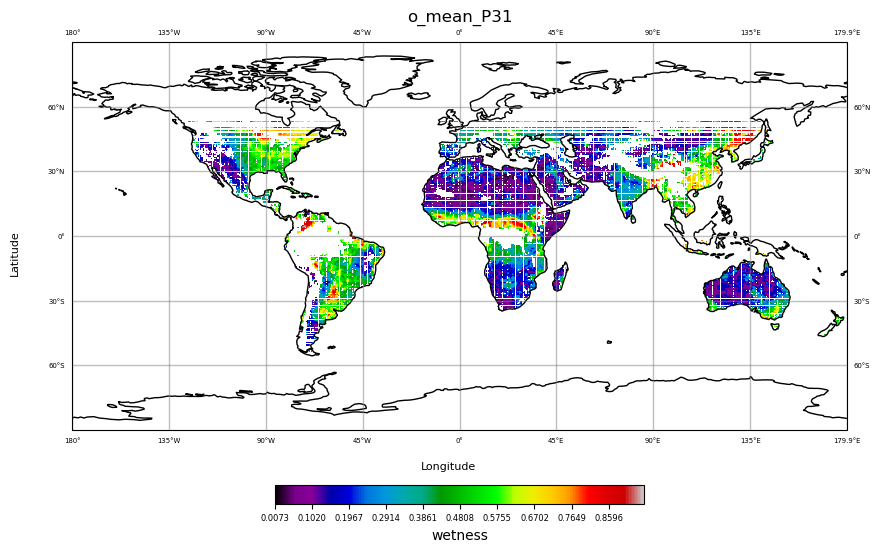

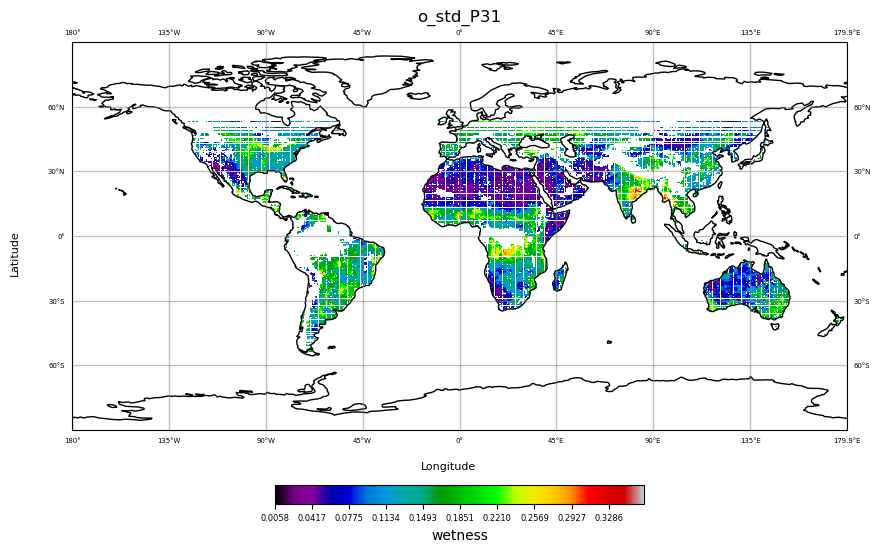

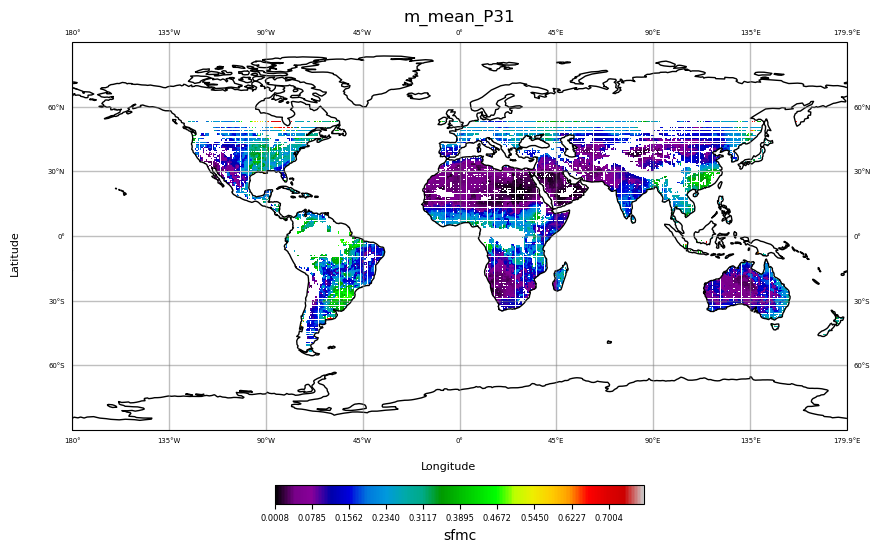

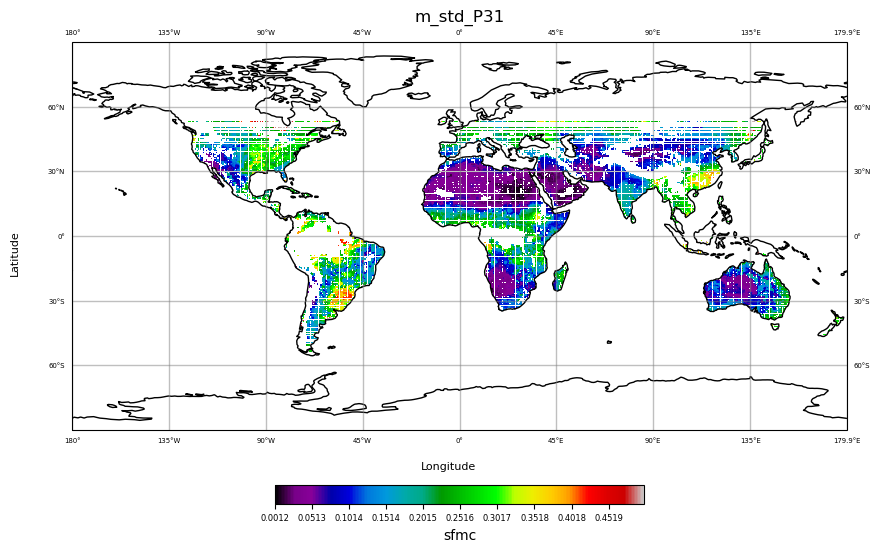

In [30]:
plot_global_contour(lon2d, lat2d, o_mean.T, True, 'o_mean_P31', 'wetness')
plot_global_contour(lon2d, lat2d, o_std.T, True, 'o_std_P31', 'wetness')
plot_global_contour(lon2d, lat2d, m_mean.T, True, 'm_mean_P31', 'sfmc')
plot_global_contour(lon2d, lat2d, m_std.T, True, 'm_std_P31', 'sfmc')

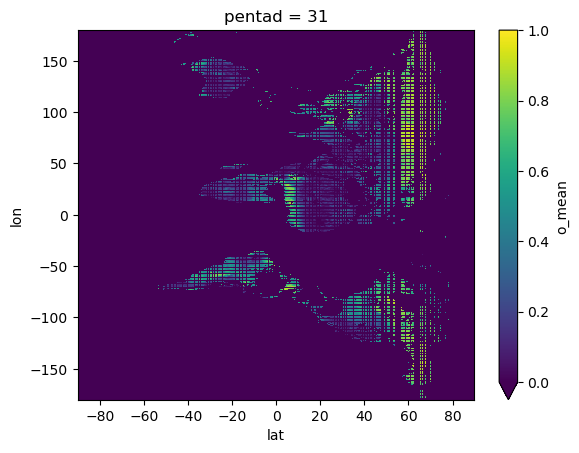

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from mapper_functions import plot_global_contour

# Open the netCDF file using xarray
ds = xr.open_dataset('/discover/nobackup/amfox/Experiments/ASCAT_3Y_v2/ASCAT_M36/output/SMAP_EASEv2_M36_GLOBAL/stats/z_score_clim_v2/combined_all_pentads_M36_zscore_stats_2015_doy152_2017_doy365_hscale_0.00.nc4')

# Select the variable of interest (o_mean) for pentad 31
o_mean = ds['o_mean'].sel(pentad=31)
o_std = ds['o_std'].sel(pentad=31)
m_mean = ds['m_mean'].sel(pentad=31)
m_std = ds['m_std'].sel(pentad=31)

o_mean.plot(vmin=0, vmax=1)
plt.show()

lat = ds['lat']
lon = ds['lon']

# Create 2D grid of lons and lats
lon2d, lat2d = np.meshgrid(lon, lat)

# Replace values less than -10 with NaN
o_mean = np.where(o_mean < -1000, np.nan, o_mean)
o_std = np.where(o_std < -1000, np.nan, o_std)
m_mean = np.where(m_mean < -1000, np.nan, m_mean)
m_std = np.where(m_std < -1000, np.nan, m_std)

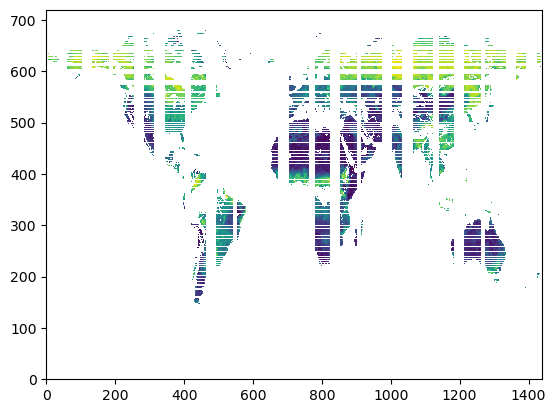

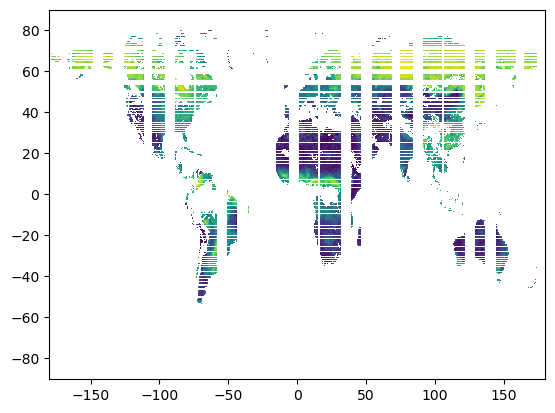

In [17]:

data = np.random.rand(10, 10)
plt.pcolormesh(o_mean.T, cmap='viridis')
plt.show()
np.nanmax(o_mean)
lat2d[:,0]

plt.pcolormesh(lon2d, lat2d, o_mean.T, shading='auto')
plt.show()

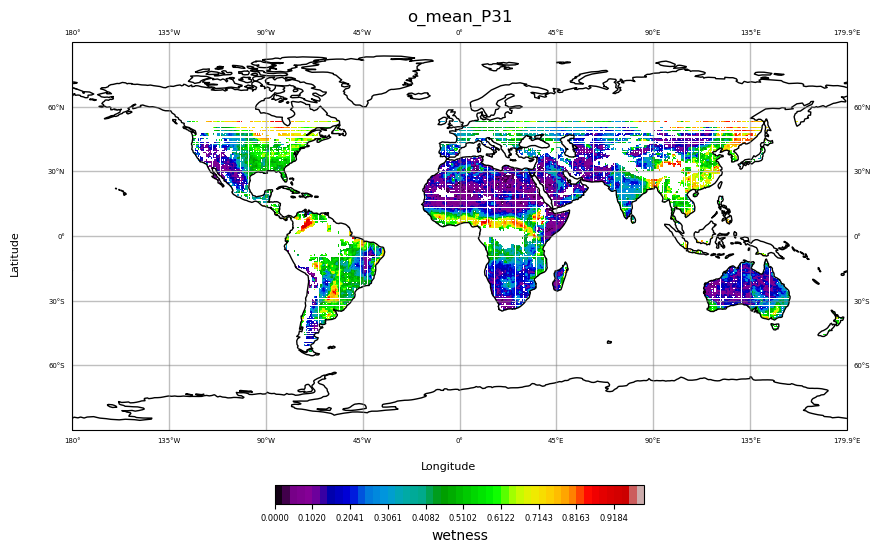

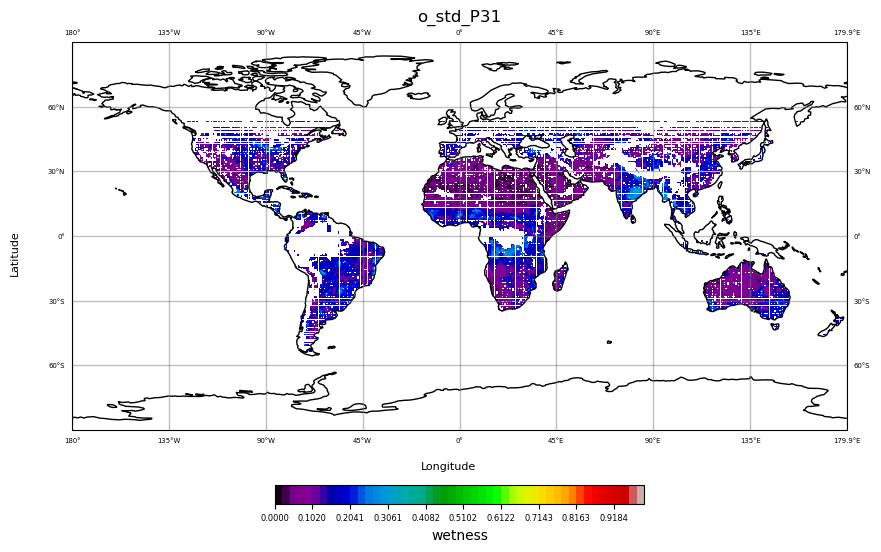

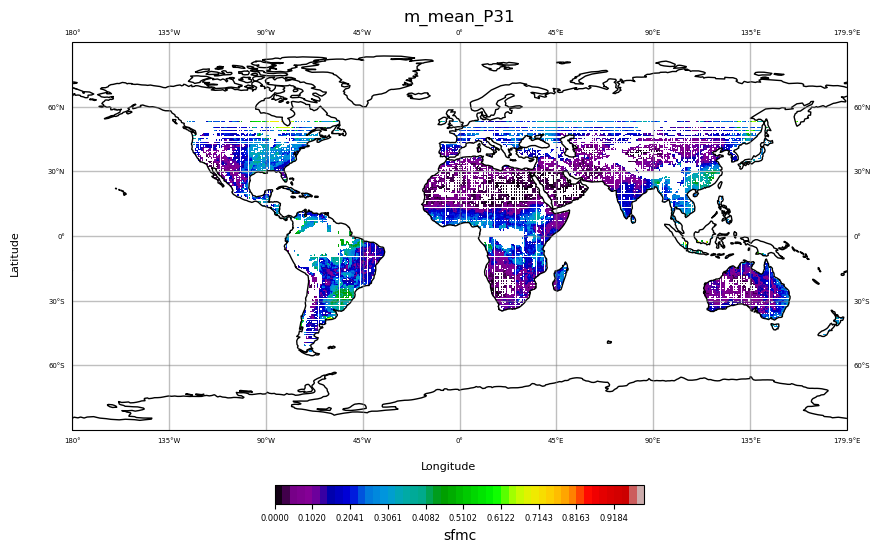

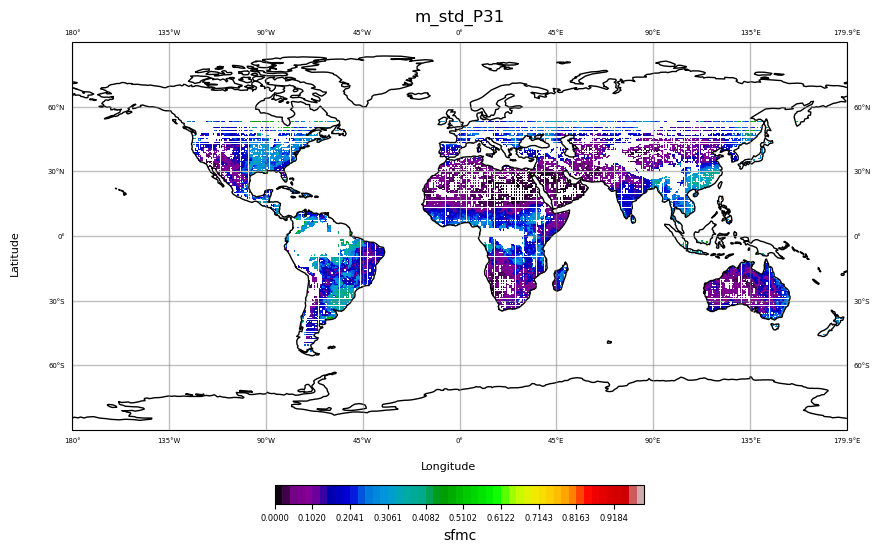

In [2]:
plot_global_contour(lon2d, lat2d, o_mean.T, False, 'o_mean_P31', 'wetness')
plot_global_contour(lon2d, lat2d, o_std.T, False, 'o_std_P31', 'wetness')
plot_global_contour(lon2d, lat2d, m_mean.T, False, 'm_mean_P31', 'sfmc')
plot_global_contour(lon2d, lat2d, m_std.T, False, 'm_std_P31', 'sfmc')